In [10]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [11]:
generators = ['DG', 'JE', 'JSF']
colors = ['darkorange','green','red']

In [12]:
df_with_outliers = pd.read_csv("./results/results.csv")


In [13]:
# Afficher les premières lignes du DataFrame
df_with_outliers.head()


,schema,DG_ted,JE_ted,JSF_ted,DG_number_errors,JE_number_errors,JSF_number_errors,correct_instance_ast_size,DG_ast_size,JE_ast_size,JSF_ast_size
0,o1,0.0,14.0,60.0,0.0,0.0,0.0,3,3.0,17.0,73.0
1,o10008,0.0,116.0,1.0,0.0,0.0,0.0,5,5.0,155.0,5.0
2,o10009,0.0,0.0,8.0,0.0,0.0,0.0,1,1.0,1.0,9.0
3,o10010,0.0,0.0,4.0,0.0,0.0,0.0,1,1.0,1.0,5.0
4,o10011,0.0,2.0,10.0,0.0,2.0,0.0,3,3.0,3.0,15.0


# Distributions & Outliers

In [14]:

# Définir les noms des colonnes pour chaque générateur


# Créer une figure et des axes pour les subplots
def gen_general_stats(df):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

    # Boucler à travers chaque générateur et tracer les mesures statistiques dans les subplots
    for i, (gen,color) in enumerate(zip(generators,colors)):
        # Calculer les mesures statistiques pour le générateur actuel
        generator=f'{gen}_ted'
        mean = df[generator].mean()
        std_dev = df[generator].std()
        median = df[generator].median()
        Q1 = df[generator].quantile(0.25)
        Q3 = df[generator].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Trouver les valeurs aberrantes pour le générateur actuel
        outliers = df[(df[generator] < lower_bound) | (df[generator] > upper_bound)][generator]
        print(lower_bound,upper_bound,Q1,Q3,IQR)

        # Tracer les mesures statistiques dans le subplot correspondant
        row = i
        col = 0
        
        # Distribution
        axes[row, col].hist(df[generator], bins=20, color='blue', alpha=0.7)
        axes[row, col].set_title(f'Distribution de TED {gen}')
        # Ajouter des cercles rouges pour les valeurs aberrantes
        # axes[row, col].scatter(outliers.index, outliers, color='red', marker='o', label='Outliers')
        # axes[row, col].legend()
        
        # Moyenne 
        col += 1
        axes[row, col].hist(df[generator], bins=20, color=color, alpha=0.7)
        axes[row, col].axvline(mean, color='red', linestyle='--', label='Moyenne')
        axes[row, col].set_title('Moyenne')
        axes[row, col].legend()
        
        # Écart 
        col += 1
        axes[row, col].hist(df[generator], bins=20, color=color, alpha=0.7)
        axes[row, col].axvline(mean + std_dev, color='red', linestyle=':', label='Moyenne + Écart-type')
        axes[row, col].axvline(mean - std_dev, color='red', linestyle=':', label='Moyenne - Écart-type')
        axes[row, col].set_title('Écart-type')
        axes[row, col].legend()
        
        # Mediane 
        col += 1
        axes[row, col].hist(df[generator], bins=20, color=color, alpha=0.7)
        axes[row, col].axvline(median, color='green', linestyle='-.', label='Médiane')
        axes[row, col].set_title('Médiane')
        axes[row, col].legend()

    # Réglage de l'espacement entre les subplots
    plt.tight_layout()
    plt.show()

-3.0 5.0 0.0 2.0 2.0
-55.5 100.5 3.0 42.0 39.0
-69.0 131.0 6.0 56.0 50.0


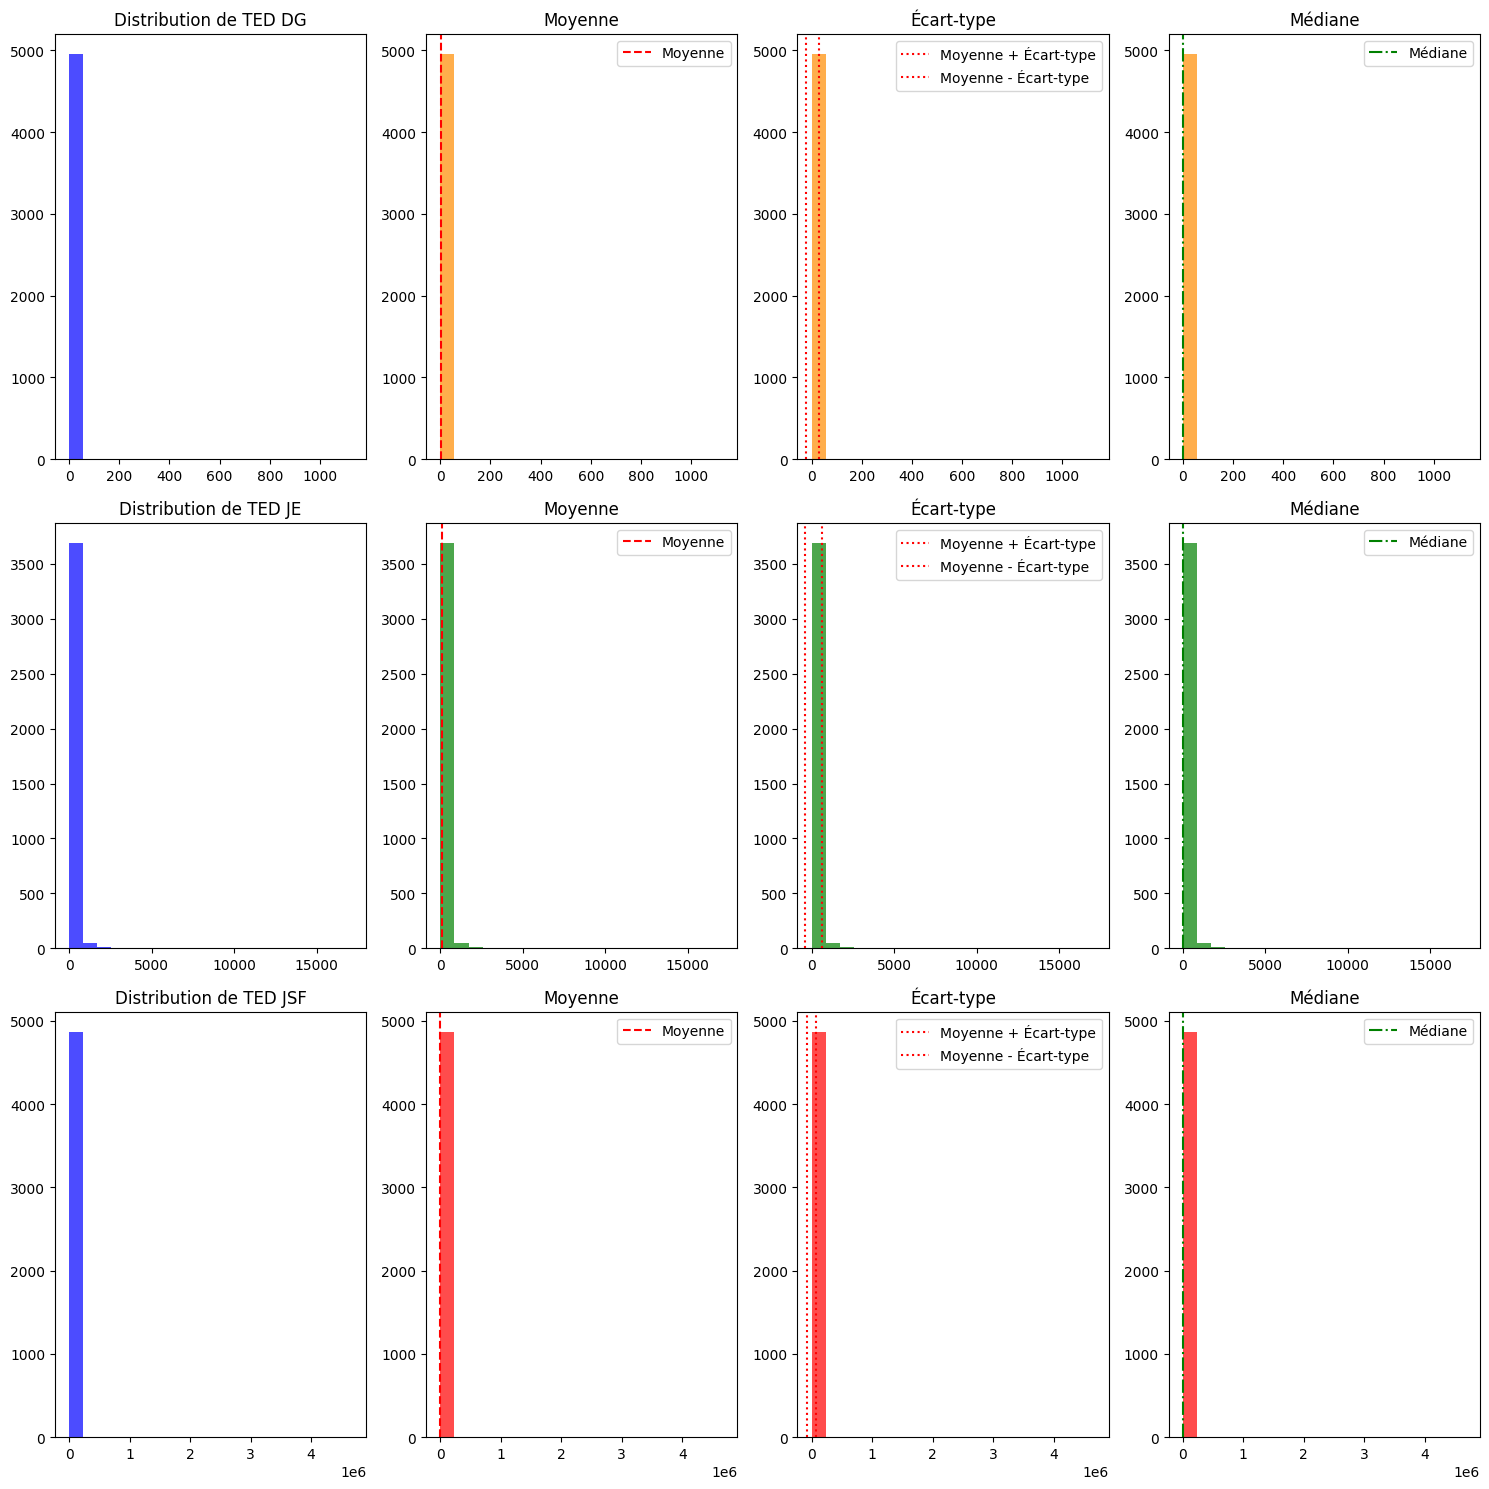

In [98]:
gen_general_stats(df_with_outliers)

**filtrer les données**

In [4]:
# Calculer la médiane de chaque générateur
median_JE = df_with_outliers['JE_ted'].median()
median_JSF = df_with_outliers['JSF_ted'].median()
median_DG = df_with_outliers['DG_ted'].median()

# Calculer les seuils
threshold_JE = 1000
threshold_JSF = 1500
threshold_DG = 50000

# Filtrer les lignes
df = df_with_outliers[(df_with_outliers['JE_ted'] < threshold_JE) & (df_with_outliers['JSF_ted'] < threshold_JSF) & (df_with_outliers['DG_ted'] < threshold_DG)]


In [5]:
df[df['DG_ted']>3000]

,schema,DG_ted,JE_ted,JSF_ted,DG_number_errors,JE_number_errors,JSF_number_errors,correct_instance_ast_size,DG_ast_size,JE_ast_size,JSF_ast_size


-3.0 5.0 0.0 2.0 2.0
-51.0 93.0 3.0 39.0 36.0
-46.5 93.5 6.0 41.0 35.0


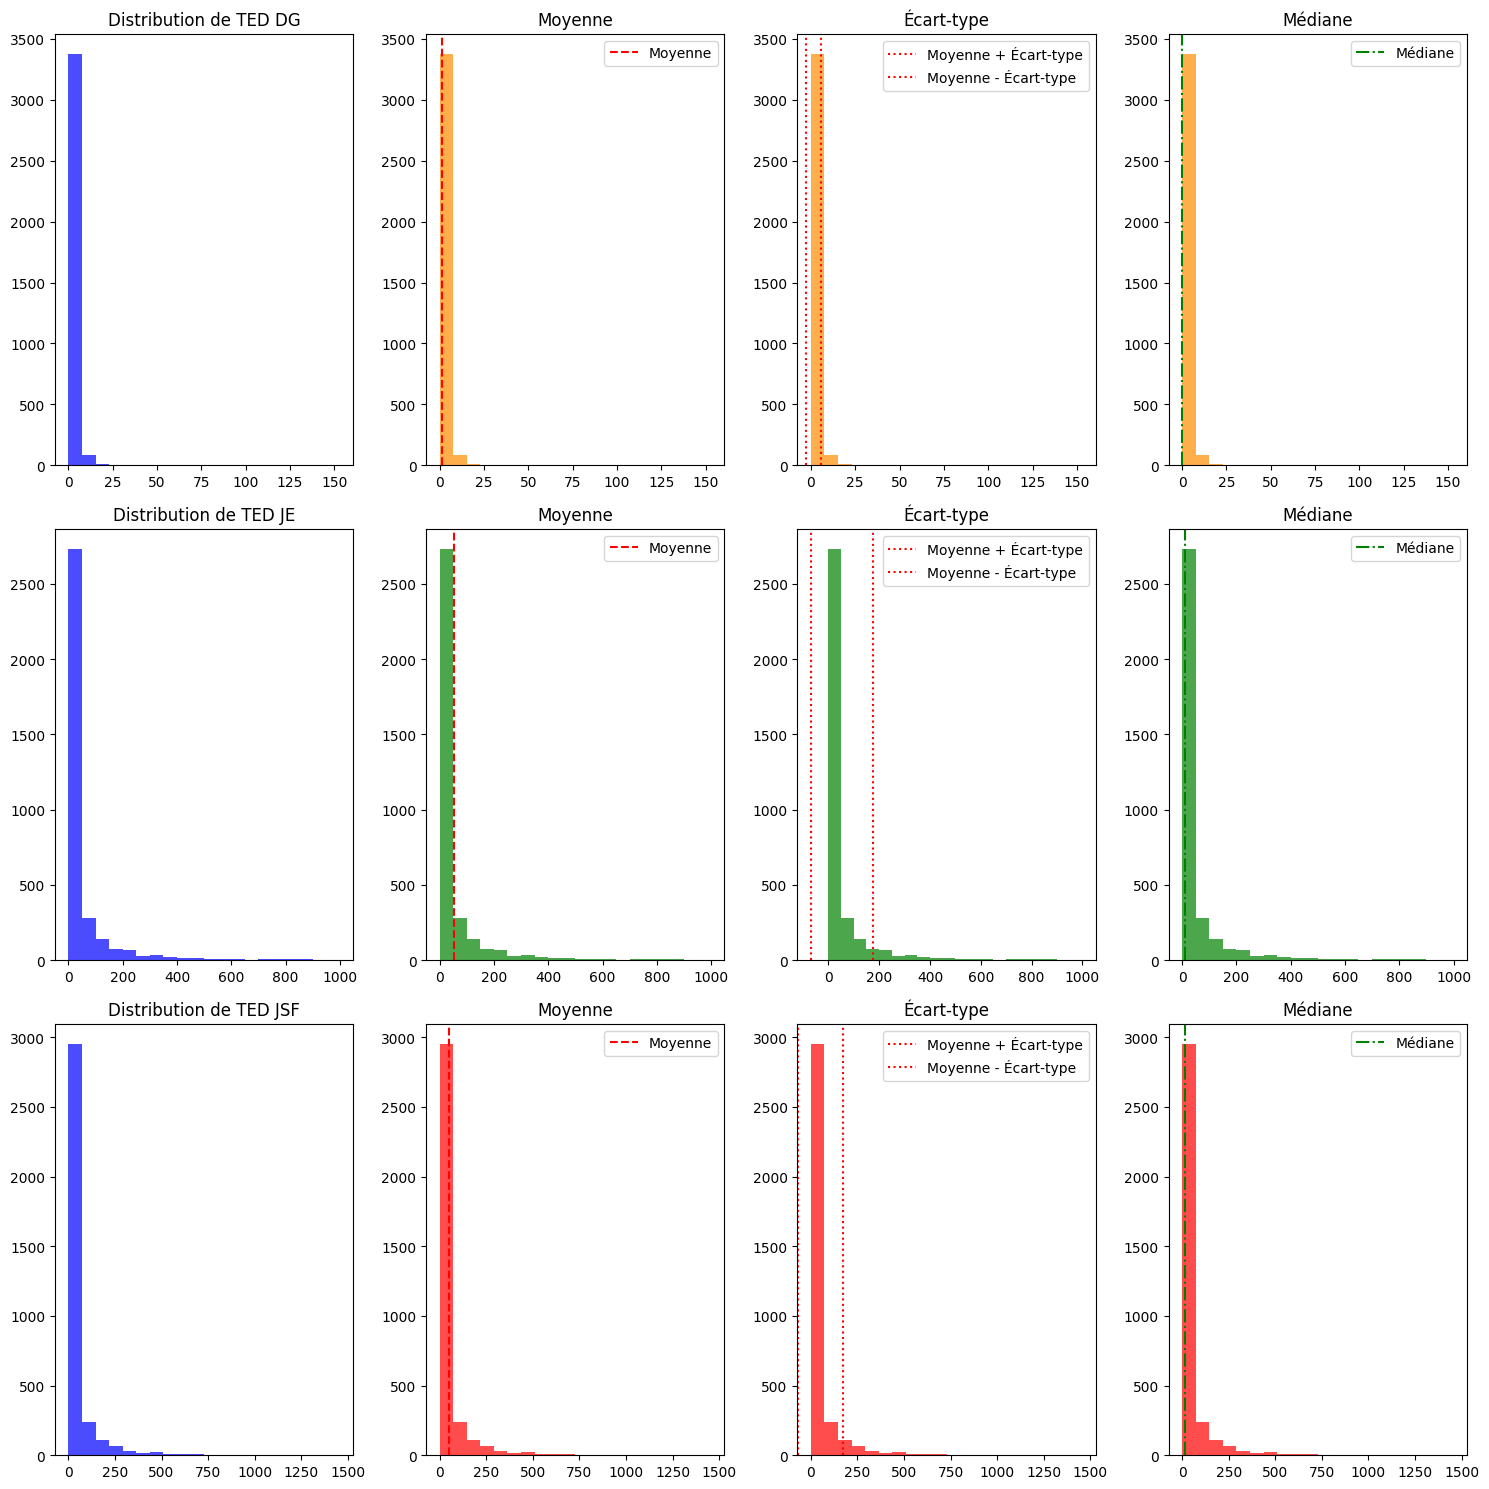

In [99]:
gen_general_stats(df)

In [71]:
df[df['JSF_ted']>1000]

,schema,DG_ted,JE_ted,JSF_ted,DG_number_errors,JE_number_errors,JSF_number_errors,correct_instance_ast_size,DG_ast_size,JE_ast_size,JSF_ast_size
247,o13934,0.0,0.0,1023.0,0.0,0.0,0.0,1,1.0,1.0,1431.0
1818,o4413,0.0,25.0,1316.0,0.0,8.0,0.0,3,3.0,35.0,1627.0
2123,o48094,3.0,122.0,1456.0,0.0,12.0,39.0,25,25.0,167.0,1559.0
2474,o56003,0.0,0.0,1172.0,0.0,0.0,0.0,1,1.0,1.0,2155.0
3646,o72528,0.0,0.0,1022.0,0.0,0.0,36.0,1,1.0,1.0,1147.0
4825,o90832,1.0,329.0,1180.0,0.0,83.0,5.0,13,13.0,431.0,1301.0
4852,o90972,0.0,12.0,1130.0,0.0,0.0,0.0,1,1.0,13.0,1411.0
4873,o91034,7.0,384.0,1218.0,0.0,0.0,0.0,27,27.0,539.0,1531.0
4950,o9782,0.0,6.0,1362.0,0.0,0.0,0.0,1,1.0,7.0,2427.0



Statistiques pour chaque générateur :
 schema     3485
DG_ted     3485
JE_ted     3485
JSF_ted    3485
dtype: int64


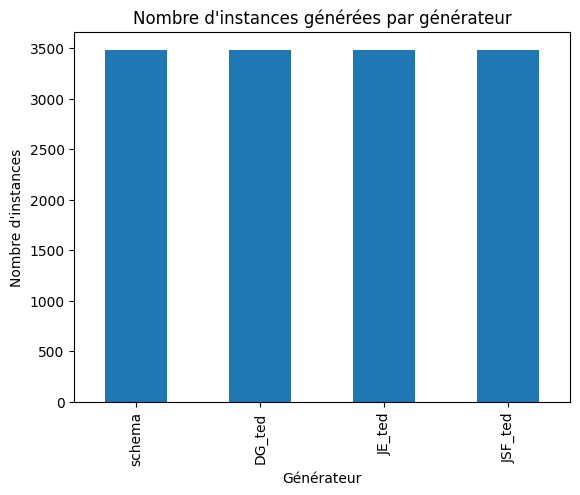

In [41]:


# Calculer les statistiques pour chaque générateur
stats_generators = df[['schema','DG_ted', 'JE_ted', 'JSF_ted']].count()
print("\nStatistiques pour chaque générateur :\n", stats_generators)

# Créer un graphique montrant le nombre d'instances générées par chaque générateur
stats_generators.plot(kind='bar', title='Nombre d\'instances générées par générateur')
plt.xlabel('Générateur')
plt.ylabel('Nombre d\'instances')
plt.show()


Text(0, 0.5, 'Fréquence')

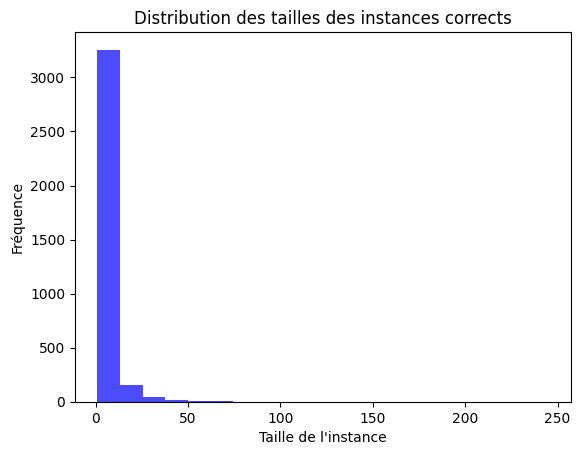

In [42]:
# Tracer la distribution des tailles des instances générées
plt.title('Distribution des tailles des instances corrects')
plt.xlabel('Taille de l\'instance')
plt.ylabel('Fréquence')


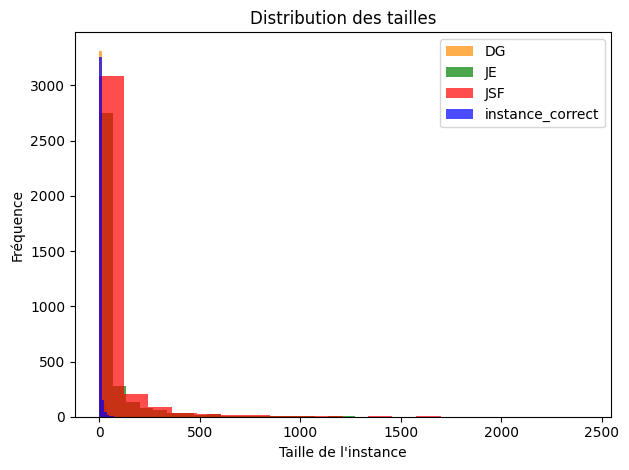

In [23]:
for gen,color in zip(generators,colors) : 
    plt.hist(df[f'{gen}_ast_size'], bins=20, color=color, alpha=0.7,label=gen)
plt.hist(df['correct_instance_ast_size'], bins=20, color='blue', alpha=0.7,label='instance_correct')
plt.title(f'Distribution des tailles')
plt.xlabel('Taille de l\'instance')
plt.ylabel('Fréquence')
plt.legend()

plt.tight_layout()
plt.show()

# Distribution des distances d'édition 

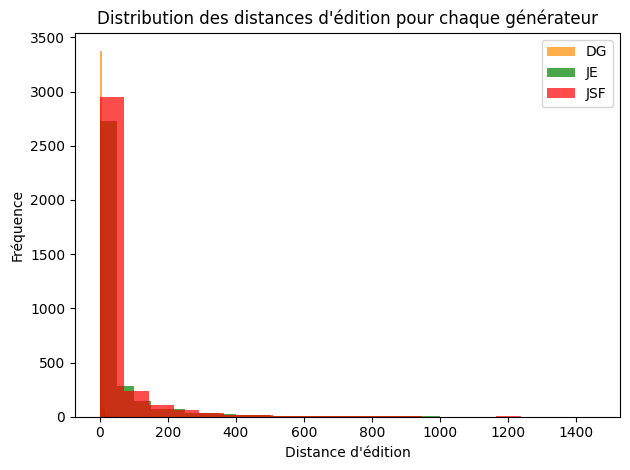

In [62]:
# Charger le fichier CSV dans un DataFrame


# Tracer la distribution des distances d'édition pour chaque générateur
for gen,color in zip(generators,colors):
    plt.hist(df[f'{gen}_ted'], bins=20, color=color, alpha=0.7, label=gen)
plt.title('Distribution des distances d\'édition pour chaque générateur')
plt.xlabel('Distance d\'édition')
plt.ylabel('Fréquence')
plt.legend()

plt.tight_layout()
plt.show()

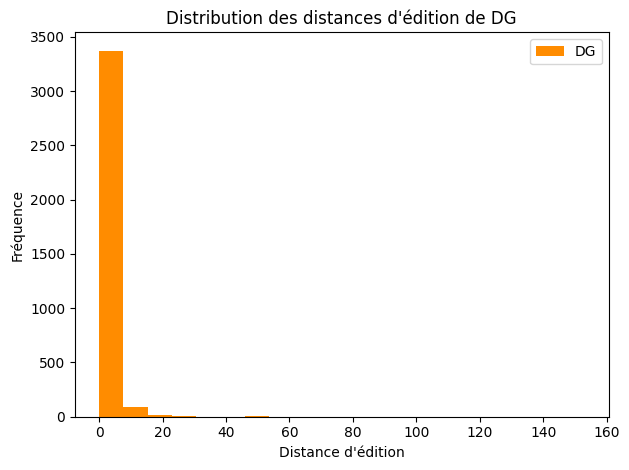

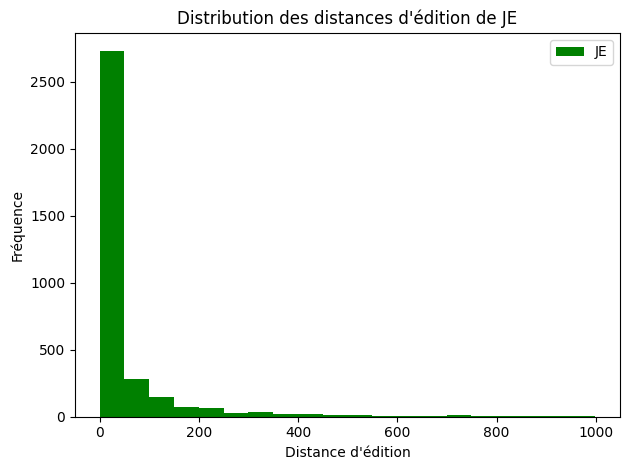

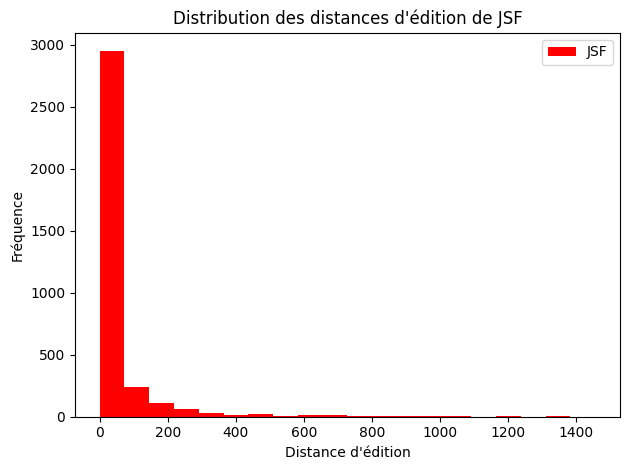

In [63]:
for gen,color in zip(generators,colors) : 
    # Tracer la distribution des distances d'édition pour chaque générateur
    plt.hist(df[f'{gen}_ted'], bins=20, color=color, label=gen)
    plt.title(f'Distribution des distances d\'édition de {gen}')
    plt.xlabel('Distance d\'édition')
    plt.ylabel('Fréquence')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Relation entre Distance d'édition et le nombre d'erreurs  

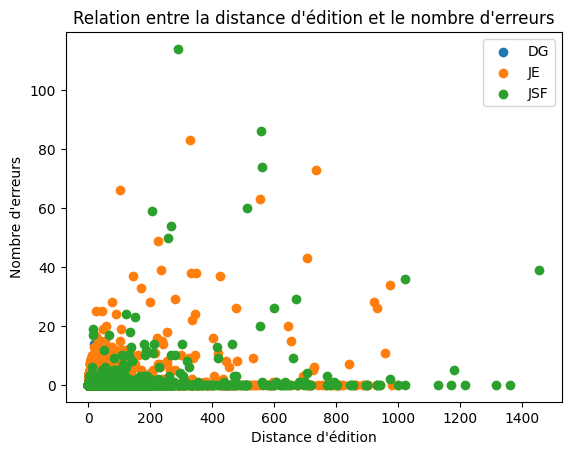

In [66]:

# Créer un graphique comparant le nombre d'erreurs avec la distance d'édition
plt.scatter(df['DG_ted'], df['DG_number_errors'], label='DG')
plt.scatter(df['JE_ted'], df['JE_number_errors'], label='JE')
plt.scatter(df['JSF_ted'], df['JSF_number_errors'], label='JSF')
plt.xlabel('Distance d\'édition')
plt.ylabel('Nombre d\'erreurs')
plt.title('Relation entre la distance d\'édition et le nombre d\'erreurs')
plt.legend()
plt.show()



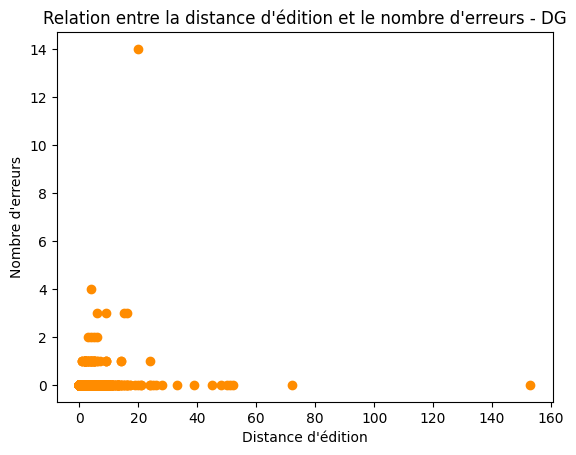

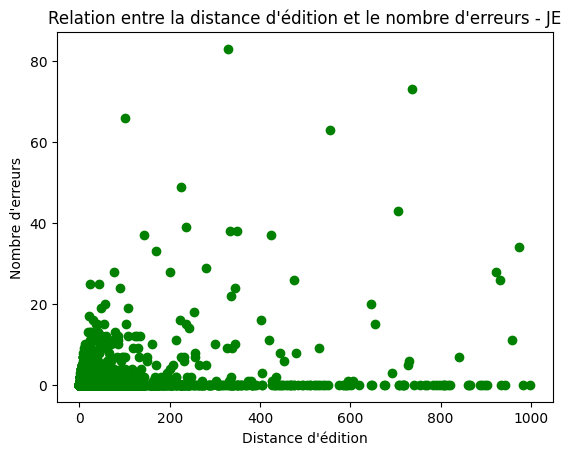

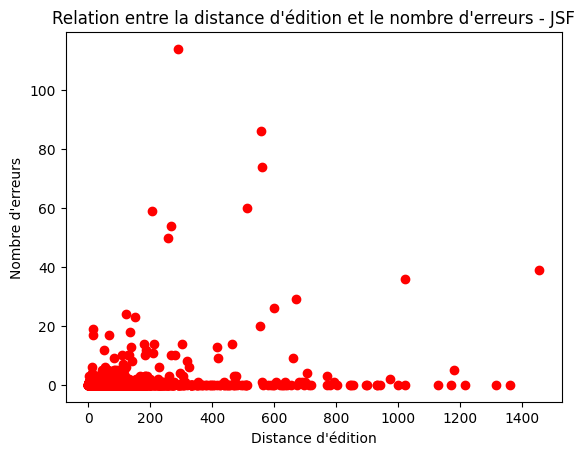

In [6]:
# Calculer les statistiques pour chaque générateur
stats_dg = df[['DG_ted', 'DG_number_errors', 'correct_instance_ast_size']].describe()
stats_je = df[['JE_ted', 'JE_number_errors', 'correct_instance_ast_size']].describe()
stats_jsf = df[['JSF_ted', 'JSF_number_errors', 'correct_instance_ast_size']].describe()

# print("\nStatistiques pour le générateur DG :\n", stats_dg)
# print("\nStatistiques pour le générateur JE :\n", stats_je)
# print("\nStatistiques pour le générateur JSF :\n", stats_jsf)

# Créer des graphiques pour chaque générateur

# Générateur DG
for gen,color in zip(generators,colors): 
    
    plt.scatter(df[f'{gen}_ted'], df[f'{gen}_number_errors'],color=color)
    plt.xlabel('Distance d\'édition')
    plt.ylabel('Nombre d\'erreurs')
    plt.title(f'Relation entre la distance d\'édition et le nombre d\'erreurs - {gen}')
    plt.show()

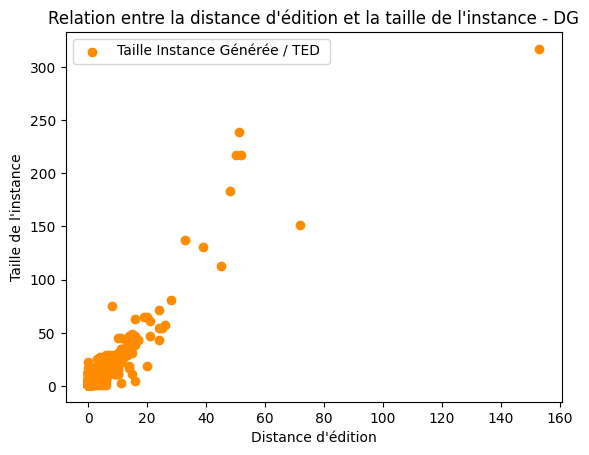

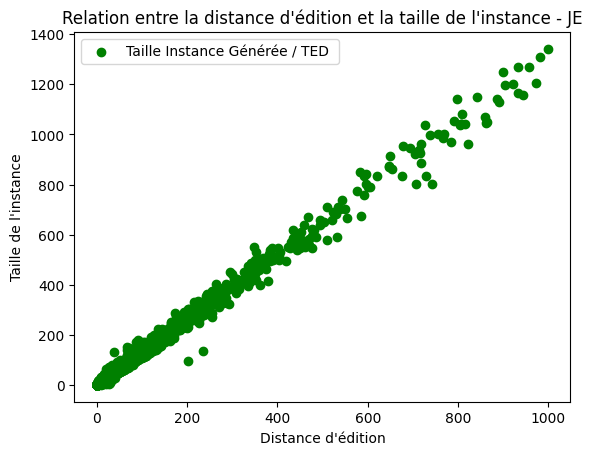

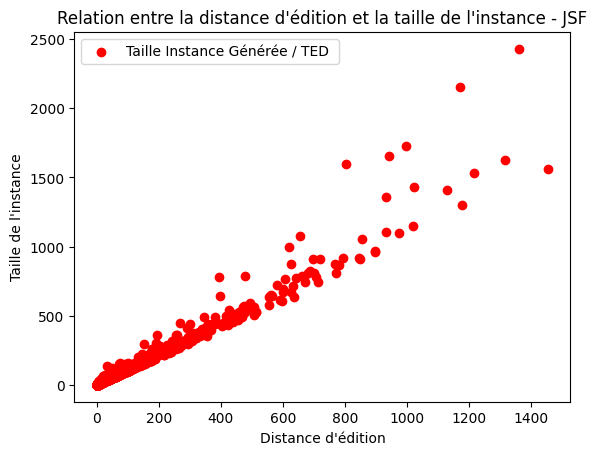

In [9]:
# Créer un graphique pour chaque générateur montrant la relation entre la distance d'édition,
# la taille de l'instance correcte et la taille de l'instance générée
for generator,color in zip(generators,colors):
    plt.scatter(df[f'{generator}_ted'], df[f'{generator}_ast_size'], label='Taille Instance Générée / TED ',color=color)
    plt.xlabel('Distance d\'édition')
    plt.ylabel('Taille de l\'instance')
    plt.title(f'Relation entre la distance d\'édition et la taille de l\'instance - {generator}')
    plt.legend()
    plt.show()